<a href="https://colab.research.google.com/github/SantiM01/Senior-Project/blob/main/Game_by_Game_rush_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('filtered_by_player_19596.csv')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check unique values for a supposed unique identifier
if 'player_id' in df.columns:
    print("Unique player IDs count:", df['player_id'].nunique())

# Get a quick statistical summary
print("Statistical summary of numerical features:")
print(df.describe())

# Check data types
print("Data types of each column:")
print(df.dtypes)


Missing values per column:
old_game_id               0
qb_id                     0
time_of_day               0
temp                      0
wind                      0
roof                      0
surface                   0
qb_rush_plays_per_game    0
qb_total_rush_plays       0
dtype: int64
Statistical summary of numerical features:
        old_game_id    qb_id        temp        wind        roof     surface  \
count  2.920000e+02    292.0  292.000000  292.000000  292.000000  292.000000   
mean   2.014623e+09  19596.0   57.345890    7.267123    0.143836    0.633562   
std    4.887512e+06      0.0   16.996873    5.497630    0.351525    0.482658   
min    2.006091e+09  19596.0   13.000000    0.000000    0.000000    0.000000   
25%    2.011071e+09  19596.0   44.000000    3.000000    0.000000    0.000000   
50%    2.015016e+09  19596.0   59.500000    7.000000    0.000000    1.000000   
75%    2.019091e+09  19596.0   70.000000   11.000000    0.000000    1.000000   
max    2.023012e+09  1959

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your dataset


# Handle NaN values for 'qb_id' and convert to int
# Assuming we're filling NaNs with -1 as a placeholder (adjust as necessary)
df['qb_id'] = df['qb_id'].fillna(-1).astype(int)

# Convert 'time_of_day' from object to datetime (no extraction of hour unless you need it)
df['time_of_day'] = pd.to_datetime(df['time_of_day'], errors='coerce')

# Assuming 'roof' and 'surface' are categorical but kept as integers if they are already appropriately coded
# If these need to be treated as categorical for modeling and are not just IDs, consider this:
# encoder = OneHotEncoder()
# encoded_features = encoder.fit_transform(df[['roof', 'surface']])
# encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['roof', 'surface']))
# df = pd.concat([df, encoded_df], axis=1)  # This adds encoded columns to the dataframe
# df.drop(['roof', 'surface'], axis=1, inplace=True)  # This removes original columns

# Now let's print out the updated data types to confirm changes
print(df.dtypes)

# Optionally, save the processed dataframe
df.to_csv('processed_dataset_for_one.csv', index=False)


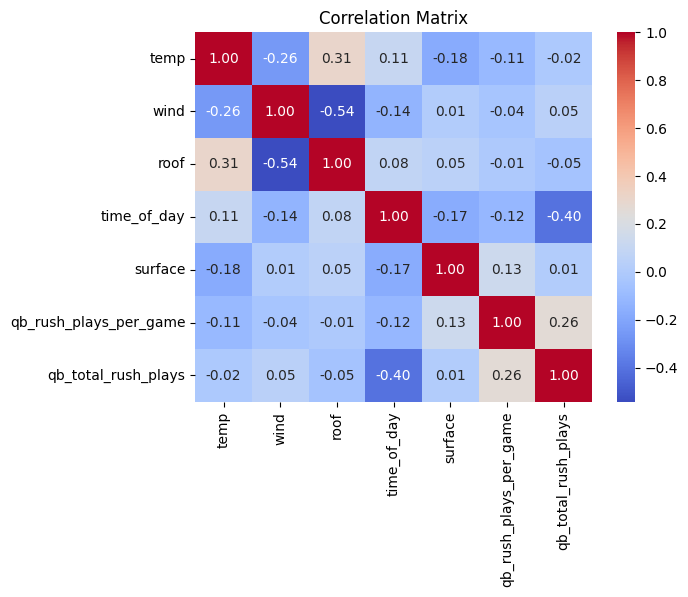

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = df.copy()

# Calculate correlation matrix
corr = data[['temp', 'wind', 'roof','time_of_day', 'surface', 'qb_rush_plays_per_game', 'qb_total_rush_plays']].corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [ ]:
###############################################################
#
#                 For one (dummy)
#
###############################################################

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

def prepare_data(df, target):
    """Prepare training and prediction datasets."""
    # Assuming the DataFrame is already sorted or sorting by a datetime field if applicable
    # df.sort_values('date_column_name', inplace=True)

    # Extracting the last value as the dummy prediction
    last_value = df[target].iloc[-1]
    return last_value

def predict_with_dummy(df, last_value):
    """Use the dummy model to predict using the last known value."""
    # Create a dummy prediction array with the last known value for the size of the dataset
    dummy_predictions = np.full(shape=(len(df),), fill_value=last_value, dtype='float')
    return dummy_predictions

def evaluate_model(y_true, y_pred):
    """Evaluate the dummy model using MAE."""
    mae = mean_absolute_error(y_true, y_pred)
    return mae

# Use the existing DataFrame 'data'
if __name__ == "__main__":
    # Assume 'data' is your DataFrame already loaded in the environment
    df = data.copy()  # Work with a copy to avoid altering the original data

    # Prepare the data
    target = 'qb_total_rush_plays'  # Specify the target column name
    last_known_value = prepare_data(df, target)

    # Predict using the dummy model
    predictions = predict_with_dummy(df, last_known_value)

    # Evaluate the model using the actual data
    true_labels = df[target]  # Adjust if you have a separate test set
    mae = evaluate_model(true_labels, predictions)
    print("Mean Absolute Error of Dummy Model:", mae)


Mean Absolute Error of Dummy Model: 8.825342465753424


In [ ]:
###############################################################
#
#                 For one (simple decision tree)
#
###############################################################

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'data' is your DataFrame
X = data[['temp', 'wind', 'roof', 'surface', 'qb_rush_plays_per_game',]]
y = data['qb_total_rush_plays']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Test RMSE:", rmse)


Test RMSE: 9.898163247322437


In [ ]:
###############################################################
#
#                 For one (adv decision tree)
#
###############################################################


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
df = data.copy() # Changed from data.copy to data.copy()

# Define features and target variable
features = ['temp', 'wind', 'roof', 'surface', 'qb_rush_plays_per_game']
target = 'qb_total_rush_plays'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Since there's no 'player_name', focus on the maximum rush attempt prediction
df_test = df.iloc[y_test.index].copy()
df_test['predicted_rush_attempts'] = y_pred
max_rush_attempt = df_test['predicted_rush_attempts'].max()
print(f"Maximum predicted rush attempts: {max_rush_attempt}")

Mean Absolute Error: 7.913637516862255
Maximum predicted rush attempts: 48.20990753173828


In [ ]:
###############################################################
#
#                 For one (adv decision tree)
#
###############################################################

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = data.copy()

# Assuming 'roof' and 'surface' might be categorical
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['roof', 'surface']])
# Check your scikit-learn version and use the appropriate method
try:
    encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['roof', 'surface']))
except AttributeError:  # Fallback for older versions of scikit-learn
    encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names(['roof', 'surface']))
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

# Define features and target variable
features = ['temp', 'wind'] + list(encoded_df.columns) + ['qb_rush_plays_per_game']
target = 'qb_total_rush_plays'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBRegressor model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
model.fit(X_train, y_train)

# Predict on the test set and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Predictions for next season based on historical averages
next_season_prediction = model.predict(pd.DataFrame([X.mean()], columns=X.columns))
print("Predicted total rush attempts for next season:", next_season_prediction[0])


Mean Absolute Error: 7.913637516862255
Mean Squared Error: 99.59691828190829
R² Score: -0.18545867283275808
Predicted total rush attempts for next season: 38.099083


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}

Test Mean Absolute Error: 6.967039851819054
Mean Squared Error: 74.92963204229146
R² Score: 0.10814527508491267


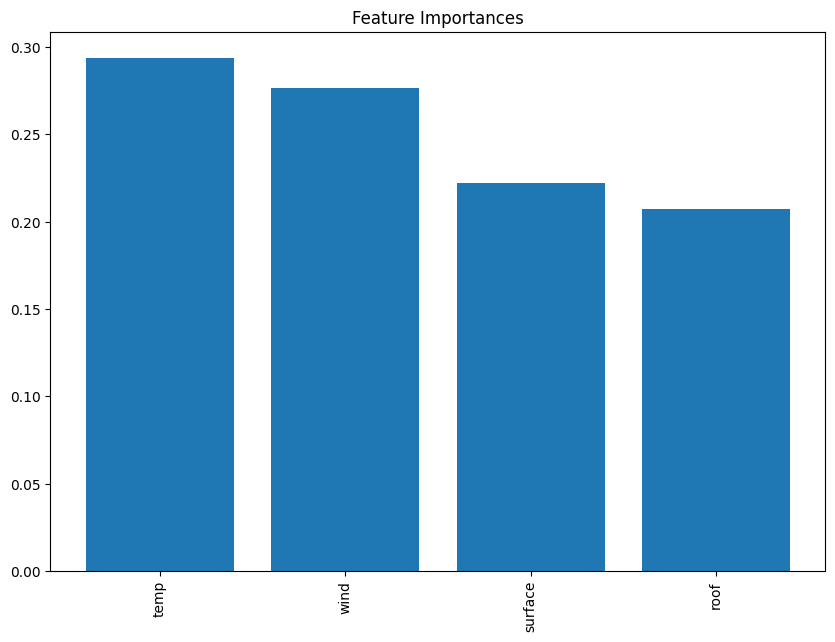

Predicted total rush attempts for next season: 39.89997


In [ ]:
###############################################################
#
#                  For one (random forrest)
#
###############################################################

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = data.copy()  # Assuming 'data' is pre-loaded DataFrame

# Define features and target variable
features = ['temp', 'wind', 'roof', 'surface', ]
target = 'qb_total_rush_plays'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_absolute_error', cv=3, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best estimator found by GridSearch
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Predict on the test set with the best model
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nTest Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Feature Importance
feature_importances = best_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[sorted_idx], rotation=90)
plt.show()

# Assuming you need to estimate conditions for next season's games
average_temp = df['temp'].mean()
average_wind = df['wind'].mean()
most_common_roof = int(df['roof'].mode()[0])
most_common_surface = int(df['surface'].mode()[0])
#average_qb_rush_plays_per_game = df['qb_rush_plays_per_game'].mean()

# Create a DataFrame for next season's predicted games based on historical averages
next_season_features = pd.DataFrame({
    'temp': [average_temp],
    'wind': [average_wind],
    'roof': [most_common_roof],
    'surface': [most_common_surface],
    #'qb_rush_plays_per_game': [average_qb_rush_plays_per_game]
})

# Predict next season's total rush attempts using the best model
next_season_prediction = best_model.predict(next_season_features)
print("Predicted total rush attempts for next season:", next_season_prediction[0])


In [ ]:
###############################################################
#
#                       For one (linear regression)
#
###############################################################

#Linear regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Assuming 'data' is a pre-loaded DataFrame
df = data.copy()  # Make a copy to avoid changing the original data

# Define features and target variable
features = ['temp', 'wind', 'roof', 'surface', 'qb_rush_plays_per_game']
target = 'qb_total_rush_plays'

# Extract features and target from the DataFrame
X = df[features]
y = df[target]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Optional: Predicting future data if needed
# Prepare new data similar to 'next_season_features' if needed and predict
# Example - predict using mean values from the current dataset
mean_values = df[features].mean().to_frame().T
future_prediction = model.predict(mean_values)
print("Predicted future value:", future_prediction[0])


Mean Absolute Error: 7.291130788895559
Predicted future value: 36.764354191859354


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.read_csv('cleaned_final_filtered_file_all_qbs2_all_seasons_with_per_game_with_touchdowns.csv')

len(df['qb_id'].unique())

292

In [3]:


# Load the dataset
df = pd.read_csv('cleaned_final_filtered_file_all_qbs2_all_seasons_with_per_game_with_touchdowns.csv')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check unique values for a supposed unique identifier
if 'player_id' in df.columns:
    print("Unique player IDs count:", df['player_id'].nunique())

# Get a quick statistical summary
print("Statistical summary of numerical features:")
print(df.describe())

# Check data types
print("Data types of each column:")
print(df.dtypes)


Missing values per column:
old_game_id                 0
qb_id                       0
defteam                     0
time_of_day               666
temp                        0
wind                        0
roof                        0
surface                     0
total_td_per_game           0
pass_td_per_game            0
rush_td_per_game            0
qb_rush_plays_per_game      0
qb_total_rush_plays         0
dtype: int64
Statistical summary of numerical features:
        old_game_id         qb_id          temp          wind          roof  \
count  1.090200e+04  10902.000000  10902.000000  10902.000000  10902.000000   
mean   2.014228e+09  25677.463952     61.286828      5.997340      0.293524   
std    4.969838e+06   7175.683455     15.469712      5.993965      0.455397   
min    2.006091e+09    865.000000     -6.000000      0.000000      0.000000   
25%    2.010100e+09  22803.000000     52.000000      0.000000      0.000000   
50%    2.014111e+09  26158.000000     68.000000      

In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load your dataset


# Handle NaN values for 'qb_id' and convert to int
# Assuming we're filling NaNs with -1 as a placeholder (adjust as necessary)
df['qb_id'] = df['qb_id'].fillna(-1).astype(int)

# Convert 'time_of_day' from object to datetime (no extraction of hour unless you need it)
df['time_of_day'] = pd.to_datetime(df['time_of_day'], errors='coerce')

# Assuming 'roof' and 'surface' are categorical but kept as integers if they are already appropriately coded
# If these need to be treated as categorical for modeling and are not just IDs, consider this:
# encoder = OneHotEncoder()
# encoded_features = encoder.fit_transform(df[['roof', 'surface']])
# encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['roof', 'surface']))
# df = pd.concat([df, encoded_df], axis=1)  # This adds encoded columns to the dataframe
# df.drop(['roof', 'surface'], axis=1, inplace=True)  # This removes original columns

# Now let's print out the updated data types to confirm changes
print(df.dtypes)

# Optionally, save the processed dataframe
df.to_csv('processed_dataset_for_all.csv', index=False)

filtered_df = df.copy()


old_game_id                             int64
qb_id                                   int64
defteam                                object
time_of_day               datetime64[ns, UTC]
temp                                  float64
wind                                  float64
roof                                    int64
surface                                 int64
total_td_per_game                     float64
pass_td_per_game                      float64
rush_td_per_game                      float64
qb_rush_plays_per_game                float64
qb_total_rush_plays                     int64
dtype: object


In [ ]:
###############################################################
#
#                       For All (dummy)
#
###############################################################

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error

def prepare_data(df, target):
    """Extract the last value from the data for dummy prediction."""
    if len(df) >= 10:  # Assuming at least one past game data is available for prediction
        last_value = df[target].iloc[-1]
        return last_value
    return None

def predict_with_dummy(df, last_value):
    """Generate dummy predictions using the last known value."""
    dummy_predictions = np.full(shape=(len(df),), fill_value=last_value, dtype='float')
    return dummy_predictions

def evaluate_model(y_true, y_pred):
    """Calculate and return the mean absolute error."""
    mae = mean_absolute_error(y_true, y_pred)
    return mae

# Load the dataset
df = filtered_df

# Define the target variable
target = 'qb_rush_plays_per_game'

results = []  # List to store results for each QB

# Iterate over each unique QB
for qb_id in df['qb_id'].unique():
    # Filter data for the current QB
    qb_data = df[df['qb_id'] == qb_id]

    # Prepare the last known value from the QB's data
    last_known_value = prepare_data(qb_data, target)

    if last_known_value is not None:
        # Predict using the dummy model
        predictions = predict_with_dummy(qb_data[:-1], last_known_value)  # Exclude the last game to use as a ground truth

        # Evaluate the model
        mae = evaluate_model(qb_data[target].iloc[1:], predictions)  # Use all except the first game for evaluation

        # Store results
        results.append({
            'QB ID': qb_id,
            'Mean Absolute Error': mae,
            'Predicted Rush Attempts': last_known_value
        })
    else:
        print(f"QB ID {qb_id}: Not enough data for prediction.")

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print(results_df)

# Optionally, save results to CSV
results_df.to_csv('qb_dummy_model_results_per_game.csv', index=False)


QB ID 22005: Not enough data for prediction.
QB ID 1361: Not enough data for prediction.
QB ID 1823: Not enough data for prediction.
QB ID 20405: Not enough data for prediction.
QB ID 22026: Not enough data for prediction.
QB ID 18272: Not enough data for prediction.
QB ID 20305: Not enough data for prediction.
QB ID 21379: Not enough data for prediction.
QB ID 20434: Not enough data for prediction.
QB ID 19623: Not enough data for prediction.
QB ID 23859: Not enough data for prediction.
QB ID 22039: Not enough data for prediction.
QB ID 10455: Not enough data for prediction.
QB ID 24824: Not enough data for prediction.
QB ID 22590: Not enough data for prediction.
QB ID 7576: Not enough data for prediction.
QB ID 4293: Not enough data for prediction.
QB ID 19587: Not enough data for prediction.
QB ID 22744: Not enough data for prediction.
QB ID 25427: Not enough data for prediction.
QB ID 23158: Not enough data for prediction.
QB ID 21277: Not enough data for prediction.
QB ID 26234: N

In [ ]:
###############################################################
#
#                For All (linear regression)
#
###############################################################


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = filtered_df  # Assuming you already filtered it before

# Define features and target
features = ['temp', 'wind', 'roof', 'surface']
target = 'qb_rush_plays_per_game'

# How many future games to predict
n_games_ahead = 3

results = []

# Iterate over each QB
for qb_id in df['qb_id'].unique():
    qb_data = df[df['qb_id'] == qb_id]

    if len(qb_data) < 10:
        print(f"Not enough data for QB ID {qb_id}")
        continue

    # Split chronologically
    test_size = 0.2
    split_index = int((1 - test_size) * len(qb_data))
    X_train = qb_data[features][:split_index]
    y_train = qb_data[target][:split_index]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Start with the last known game's features
    current_features = qb_data[features].iloc[split_index - 1:split_index].copy().values
    predictions = []

    for _ in range(n_games_ahead):
        # Predict
        # Convert current_features back into a DataFrame with correct column names
        current_features_df = pd.DataFrame(current_features, columns=features)

        # Then make the prediction
        pred = model.predict(current_features_df)[0]
        predictions.append(pred)

        # Update features (simulate slight change in temp and wind)
        current_features[0][0] = np.random.normal(loc=current_features[0][0], scale=2)  # temp
        current_features[0][1] = np.random.normal(loc=current_features[0][1], scale=1)  # wind
        # roof and surface remain constant (assuming no change for now)

    # Optional: evaluate model on test set (last 20%)
    X_test = qb_data[features][split_index:]
    y_test = qb_data[target][split_index:]
    y_pred_test = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    results.append({
        'QB ID': qb_id,
        'MAE': mae,
        'Initial MSE': mse,
        'Initial R² Score': r2,
        'Predicted Next Games': predictions
    })

# Results DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv('qb_results_recursive_predictions_linear_regression_per_game.csv', index=False)
print(results_df)




Not enough data for QB ID 22005
Not enough data for QB ID 1361
Not enough data for QB ID 1823
Not enough data for QB ID 20405
Not enough data for QB ID 22026
Not enough data for QB ID 18272
Not enough data for QB ID 20305
Not enough data for QB ID 21379
Not enough data for QB ID 20434
Not enough data for QB ID 19623
Not enough data for QB ID 23859
Not enough data for QB ID 22039
Not enough data for QB ID 10455
Not enough data for QB ID 24824
Not enough data for QB ID 22590
Not enough data for QB ID 7576
Not enough data for QB ID 4293
Not enough data for QB ID 19587
Not enough data for QB ID 22744
Not enough data for QB ID 25427
Not enough data for QB ID 23158
Not enough data for QB ID 21277
Not enough data for QB ID 26234
Not enough data for QB ID 25582
Not enough data for QB ID 25592
Not enough data for QB ID 22181
Not enough data for QB ID 26296
Not enough data for QB ID 22141
Not enough data for QB ID 25970
Not enough data for QB ID 27131
Not enough data for QB ID 26196
Not enough d

In [ ]:
###############################################################
#
#                  For All (random forrest)
#
###############################################################


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = filtered_df  # Assuming 'filtered_df' is already loaded and prepared.

# Define features and target variable
features = ['temp', 'wind', 'roof', 'surface']
target = 'qb_rush_plays_per_game'

results = []

# Predicting multiple future games
n_games_ahead = 3  # Define how many games into the future you want to predict

# Iterate over each unique QB
for qb_id in df['qb_id'].unique():
    qb_df = df[df['qb_id'] == qb_id]  # Filter data for the current QB

    if len(qb_df) < 10:  # Ensure there is enough data to split and train
        print(f"Not enough data for QB ID {qb_id}")
        continue

    # Split data into training and test sets maintaining chronological order
    test_size = 0.2
    split_index = int((1 - test_size) * len(qb_df))
    X_train, X_test = qb_df[features][:split_index], qb_df[features][split_index:]
    y_train, y_test = qb_df[target][:split_index], qb_df[target][split_index:]

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.05, 0.1, 0.15],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }

    # Setup GridSearchCV
    grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=param_grid,
                               scoring='neg_mean_squared_error',
                               cv=3, verbose=1)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Best estimator found by GridSearch
    best_model = grid_search.best_estimator_

    # Start with the last known features for recursive forecasting
    current_features = X_test.iloc[-1:].values
    predictions = []
    for _ in range(n_games_ahead):
        next_game_prediction = best_model.predict(current_features)
        predictions.append(next_game_prediction[0])

        # Update current_features for the next prediction
        current_features[0][0] = np.random.normal(loc=current_features[0][0], scale=2)  # Generates a random number for temp from a gaussian distribution with the mean of last temp asn an std of 2
        current_features[0][1] = np.random.normal(loc=current_features[0][1], scale=1)  # Generates a random number for wind from a gaussian distribution with the mean of last temp asn an std of 1

    # Calculate metrics for the initial test set to understand model performance before forecasting
    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        'QB ID': qb_id,
        'MAE': mae,
        'Initial MSE': mse,
        'Initial R² Score': r2,
        'Predictions for Next Games': predictions
    })

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
results_df.to_csv('qb_results_with_predictions_per_game_random_forrest_3.csv', index=False)
print(results_df)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Fitting 3 folds for each of 243 candidates, totalling 7

Loaded model for QB 865
Loaded model for QB 3739
Loaded model for QB 4161
Loaded model for QB 20245
Loaded model for QB 20531
Loaded model for QB 23502
Loaded model for QB 7091
Loaded model for QB 9311
Loaded model for QB 11022
Loaded model for QB 20608
Loaded model for QB 6355
Loaded model for QB 7835
Loaded model for QB 21429
Loaded model for QB 19596
Loaded model for QB 22912
Loaded model for QB 13042
Loaded model for QB 19599
Loaded model for QB 11024
Not enough data for QB ID 22005
Loaded model for QB 22164
Loaded model for QB 24408
Loaded model for QB 3292
Loaded model for QB 19559
Loaded model for QB 24218
Loaded model for QB 17200
Loaded model for QB 23436
Loaded model for QB 5106
Loaded model for QB 22121
Not enough data for QB ID 1361
Loaded model for QB 22177
Loaded model for QB 10346
Loaded model for QB 22803
Loaded model for QB 2110
Loaded model for QB 8442
Not enough data for QB ID 1823
Loaded model for QB 22942
Loaded model for QB 23504
Loaded model for QB 6423
Loaded mo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Loaded model for QB 34869
Loaded model for QB 34855
Loaded model for QB 33357
Loaded model for QB 30279
Loaded model for QB 34343
Not enough data for QB ID 33949
Loaded model for QB 32436
Loaded model for QB 33319
Not enough data for QB ID 34369
Loaded model for QB 34577
Not enough data for QB ID 31395
Loaded model for QB 35289
Loaded model for QB 35228
Loaded model for QB 35710
Loaded model for QB 34771
Not enough data for QB ID 34412
Loaded model for QB 35264
Loaded model for QB 35232
Not enough data for QB ID 35577
Loaded model for QB 34177
Loaded model for QB 32434
Not enough data for QB ID 35652
Not enough data for QB ID 35040
Loaded model for QB 35704
Not enough data for QB ID 29857
Not enough data for QB ID 35251
Loaded model for QB 36442
Not enough data for QB ID 35752
Loaded model for QB 36355
Loaded model for QB 36389
Not enough data for QB ID 34955
Loaded model for QB 36212
Not enough data for QB ID 36384
Not enough data for QB ID 35282
Loaded model for QB 33275
Not enough d

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


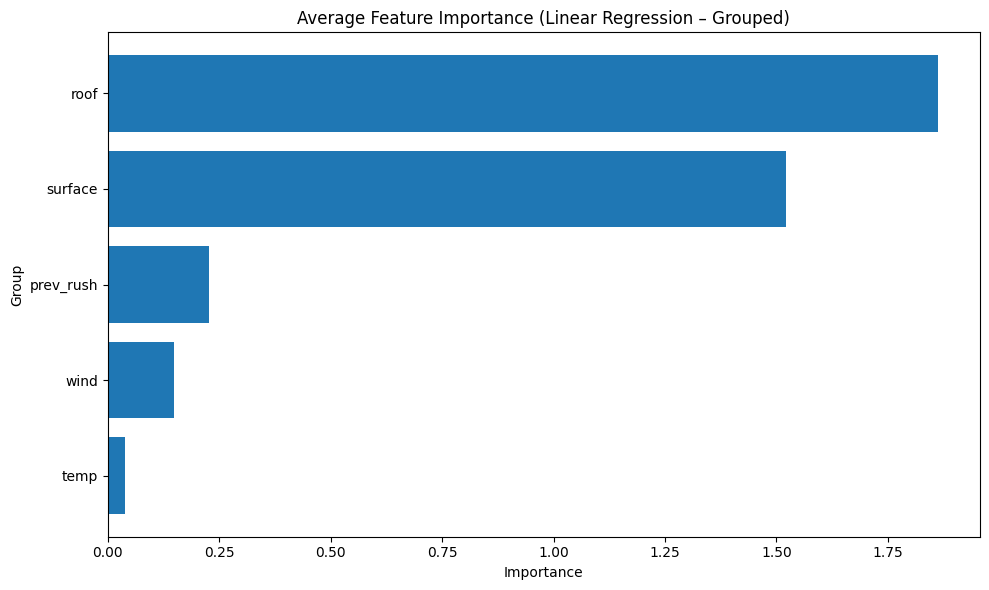

In [7]:
###############################################################
#
#   Linear Regression – Autoregressive Recursive with Saving
#
###############################################################

import os
import pandas as pd
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = filtered_df  # Replace with pd.read_csv(...) if needed

# Setup
features = ['temp', 'wind', 'roof', 'surface']
target = 'qb_rush_plays_per_game'
n_games_ahead = 3 ##########################change
model_dir = "/content/drive/MyDrive/models_linear_rush1"
os.makedirs(model_dir, exist_ok=True)

results = []
coeff_list = []

# Loop over each QB
for qb_id in df['qb_id'].unique():
    qb_data = df[df['qb_id'] == qb_id].copy()

    if len(qb_data) < 10:
        print(f"Not enough data for QB ID {qb_id}")
        continue

    # Add autoregressive feature
    qb_data['prev_rush'] = qb_data[target].shift(1)
    qb_data = qb_data.dropna().reset_index(drop=True)

    # Chronological split
    test_size = 0.2
    split_index = int((1 - test_size) * len(qb_data))
    if split_index == 0:
        print(f"Not enough training data for QB ID {qb_id}")
        continue

    X_train = qb_data[features + ['prev_rush']][:split_index]
    y_train = qb_data[target][:split_index]
    X_test = qb_data[features + ['prev_rush']][split_index:]
    y_test = qb_data[target][split_index:]

    # Save/load model
    model_path = f"{model_dir}/linear_model_{qb_id}_{target}.joblib"
    if os.path.exists(model_path):
        model = joblib.load(model_path)
        print(f"Loaded model for QB {qb_id}")
    else:
        model = LinearRegression()
        model.fit(X_train, y_train)
        joblib.dump(model, model_path)
        print(f"Trained and saved model for QB {qb_id}")

    # Recursive prediction: start with last row of training set
    initial_input = X_test.iloc[0].copy()
    predictions = []

    for _ in range(n_games_ahead):
        input_df = pd.DataFrame([initial_input])
        pred = model.predict(input_df)[0]
        predictions.append(pred)

        # Update input for next prediction
        initial_input['prev_rush'] = pred
        initial_input['temp'] = np.random.normal(loc=initial_input['temp'], scale=2)
        initial_input['wind'] = np.random.normal(loc=initial_input['wind'], scale=1)
        # roof and surface remain unchanged

    # Evaluate
    y_pred_test = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred_test)
    mse = mean_squared_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    results.append({
        'QB ID': qb_id,
        'MAE': mae,
        'Initial MSE': mse,
        'Initial R² Score': r2,
        'Predicted Next Games': predictions
    })

    # Store coefficients
    if isinstance(model.coef_, np.ndarray):
        for feat, val in zip(X_train.columns, model.coef_):
            base_feat = feat
            coeff_list.append({
                "QB ID": qb_id,
                "Feature": feat,
                "BaseFeature": base_feat,
                "Coefficient": val
            })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv('qb_results_recursive_predictions_linear_regression_per_game_autoregressive_saving_'+str(n_games_ahead)+'.csv', index=False)
print(results_df)

# Feature importance
coeff_df = pd.DataFrame(coeff_list)

grouped_importance = (
    coeff_df.groupby('BaseFeature')['Coefficient']
    .apply(lambda x: np.mean(np.abs(x)))
    .sort_values(ascending=True)
    .reset_index(name='Importance')
)

plt.figure(figsize=(10, 6))
plt.barh(grouped_importance['BaseFeature'], grouped_importance['Importance'])
plt.xlabel("Importance")
plt.ylabel("Group")
plt.title("Average Feature Importance (Linear Regression – Grouped)")
plt.tight_layout()
plt.show()


Loaded model for QB 865
Loaded model for QB 3739
Loaded model for QB 4161
Loaded model for QB 20245
Loaded model for QB 20531
Loaded model for QB 23502
Loaded model for QB 7091
Loaded model for QB 9311
Loaded model for QB 11022
Loaded model for QB 20608
Loaded model for QB 6355
Loaded model for QB 7835
Loaded model for QB 21429
Loaded model for QB 19596
Loaded model for QB 22912
Loaded model for QB 13042
Loaded model for QB 19599
Loaded model for QB 11024
Not enough data for QB ID 22005
Loaded model for QB 22164
Loaded model for QB 24408
Loaded model for QB 3292
Loaded model for QB 19559
Loaded model for QB 24218
Loaded model for QB 17200
Loaded model for QB 23436
Loaded model for QB 5106
Loaded model for QB 22121
Not enough data for QB ID 1361
Loaded model for QB 22177
Loaded model for QB 10346
Loaded model for QB 22803
Loaded model for QB 2110
Loaded model for QB 8442
Not enough data for QB ID 1823
Loaded model for QB 22942
Loaded model for QB 23504
Loaded model for QB 6423
Loaded mo

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Loaded model for QB 33040
Loaded model for QB 34869
Loaded model for QB 34855
Loaded model for QB 33357
Loaded model for QB 30279
Loaded model for QB 34343
Not enough data for QB ID 33949
Loaded model for QB 32436
Loaded model for QB 33319
Not enough data for QB ID 34369
Loaded model for QB 34577
Not enough data for QB ID 31395
Loaded model for QB 35289
Loaded model for QB 35228
Loaded model for QB 35710
Loaded model for QB 34771
Not enough data for QB ID 34412
Loaded model for QB 35264
Loaded model for QB 35232
Not enough data for QB ID 35577
Loaded model for QB 34177
Loaded model for QB 32434
Not enough data for QB ID 35652
Not enough data for QB ID 35040
Loaded model for QB 35704
Not enough data for QB ID 29857
Not enough data for QB ID 35251
Loaded model for QB 36442
Not enough data for QB ID 35752
Loaded model for QB 36355
Loaded model for QB 36389
Not enough data for QB ID 34955
Loaded model for QB 36212
Not enough data for QB ID 36384
Not enough data for QB ID 35282
Loaded model

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Not enough data for QB ID 38108
Not enough data for QB ID 37327
Not enough training data for QB ID 37834
Not enough data for QB ID 36879
Not enough data for QB ID 33292
Not enough data for QB ID 35939
Not enough data for QB ID 36991
Not enough data for QB ID 37175
Not enough data for QB ID 38122
Not enough data for QB ID 36928
Not enough data for QB ID 33550
Not enough data for QB ID 37077
     QB ID       MAE  Initial MSE  Initial R² Score  \
0      865  1.371883     1.923383         -0.335683   
1     3739  1.915298     4.308393          0.171463   
2     4161  1.094894     1.855839          0.090275   
3    20245  3.214221    12.809277         -0.517164   
4    20531  1.126985     1.674062          0.063944   
..     ...       ...          ...               ...   
177  36971  3.599541    16.270021         -0.987178   
178  36972  1.040039     3.645544         -0.356481   
179  36264  0.732361     0.536353               NaN   
180  36945  2.437282     8.386753         -0.986336   
18

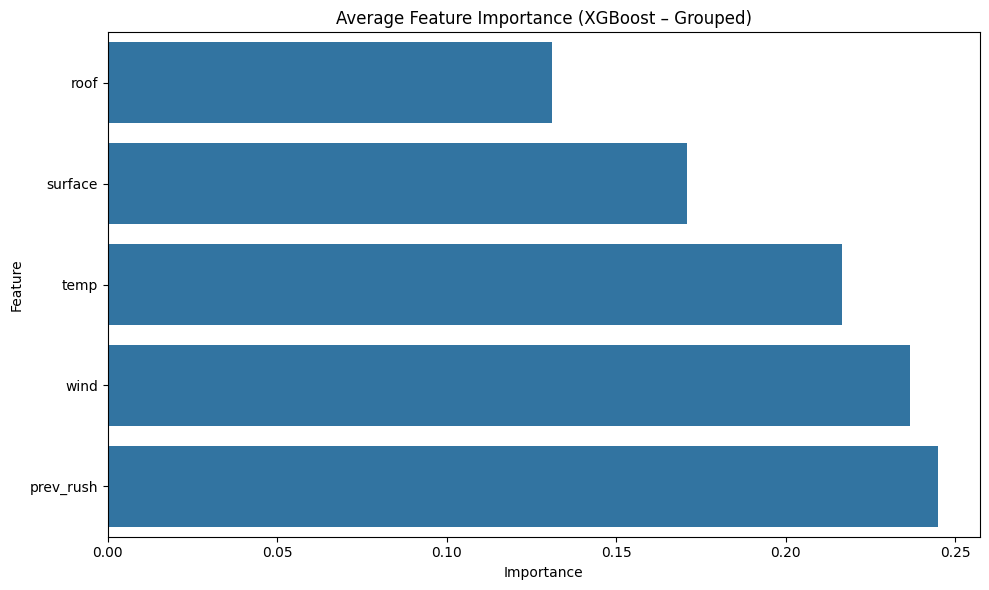

In [ ]:
###############################################################
#
#   XGBoost – Autoregressive Recursive with Model Saving
#
###############################################################

import os
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = filtered_df  # Assuming already prepared
features = ['temp', 'wind', 'roof', 'surface']
target = 'qb_rush_plays_per_game'
n_games_ahead = 3 ##########################change
model_dir = "/content/drive/MyDrive/models_xgboost_rush"
os.makedirs(model_dir, exist_ok=True)

results = []
coeff_list = []

# Iterate over each QB
for qb_id in df['qb_id'].unique():
    qb_df = df[df['qb_id'] == qb_id].copy()

    if len(qb_df) < 10:
        print(f"Not enough data for QB ID {qb_id}")
        continue

    # Add autoregressive feature
    qb_df['prev_rush'] = qb_df[target].shift(1)
    qb_df = qb_df.dropna().reset_index(drop=True)

    # Chronological split
    test_size = 0.2
    split_index = int((1 - test_size) * len(qb_df))
    if split_index == 0:
        print(f"Not enough training data for QB ID {qb_id}")
        continue

    X_train = qb_df[features + ['prev_rush']][:split_index]
    y_train = qb_df[target][:split_index]
    X_test = qb_df[features + ['prev_rush']][split_index:]
    y_test = qb_df[target][split_index:]

    # Save/load model
    model_path = f"{model_dir}/xgb_model_{qb_id}_{target}.json"

    if os.path.exists(model_path):
        model = XGBRegressor()
        model.load_model(model_path)
        print(f"Loaded model for QB {qb_id}")
    else:
        param_grid = {
            'n_estimators': [50, 100, 150],
            'learning_rate': [0.05, 0.1, 0.15],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 0.9, 1.0],
            'colsample_bytree': [0.7, 0.8, 0.9]
        }

        grid_search = GridSearchCV(
            estimator=XGBRegressor(random_state=42),
            param_grid=param_grid,
            scoring='neg_mean_squared_error',
            cv=3,
            verbose=1
        )

        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
        model.save_model(model_path)
        print(f"Trained and saved model for QB {qb_id}")

    # Recursive forecasting using last test row
    initial_input = X_test.iloc[0].copy()
    predictions = []

    for _ in range(n_games_ahead):
        input_df = pd.DataFrame([initial_input])
        pred = model.predict(input_df)[0]
        predictions.append(pred)

        # Update autoregressive + environmental features
        initial_input['prev_rush'] = pred
        initial_input['temp'] = np.random.normal(loc=initial_input['temp'], scale=2)
        initial_input['wind'] = np.random.normal(loc=initial_input['wind'], scale=1)
        # roof and surface assumed unchanged

    # Evaluate model
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'QB ID': qb_id,
        'MAE': mae,
        'Initial MSE': mse,
        'Initial R² Score': r2,
        'Predictions for Next Games': predictions
    })

    # Feature importances
    for feat, imp in zip(X_train.columns, model.feature_importances_):
        coeff_list.append({
            "QB ID": qb_id,
            "Feature": feat,
            "BaseFeature": feat,
            "Importance": imp
        })

# Save results
results_df = pd.DataFrame(results)
results_df.to_csv('qb_results_xgboost_autoregressive_saving_recursive_rush'+str(n_games_ahead)+'.csv', index=False)
print(results_df)

# Plot feature importances
coeff_df = pd.DataFrame(coeff_list)
grouped_importance = (
    coeff_df.groupby('BaseFeature')['Importance']
    .mean()
    .sort_values(ascending=True)
    .reset_index(name='Importance')
)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='BaseFeature', data=grouped_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Average Feature Importance (XGBoost – Grouped)")
plt.tight_layout()
plt.show()


In [ ]:
!zip -r models_linear_rush1.zip models_linear_rush1
!zip -r models_xgboost_rush.zip models_xgboost_rush

updating: models_linear_rush1/ (stored 0%)
updating: models_linear_rush1/linear_model_35993_qb_rush_plays_per_game.joblib (deflated 29%)
updating: models_linear_rush1/linear_model_30526_qb_rush_plays_per_game.joblib (deflated 28%)
updating: models_linear_rush1/linear_model_22177_qb_rush_plays_per_game.joblib (deflated 29%)
updating: models_linear_rush1/linear_model_30279_qb_rush_plays_per_game.joblib (deflated 28%)
updating: models_linear_rush1/linear_model_9311_qb_rush_plays_per_game.joblib (deflated 28%)
updating: models_linear_rush1/linear_model_19559_qb_rush_plays_per_game.joblib (deflated 28%)
updating: models_linear_rush1/linear_model_37013_qb_rush_plays_per_game.joblib (deflated 29%)
updating: models_linear_rush1/linear_model_28986_qb_rush_plays_per_game.joblib (deflated 29%)
updating: models_linear_rush1/linear_model_22912_qb_rush_plays_per_game.joblib (deflated 29%)
updating: models_linear_rush1/linear_model_33040_qb_rush_plays_per_game.joblib (deflated 29%)
updating: models_l